## SVM线性划分 SVM Linear Classification

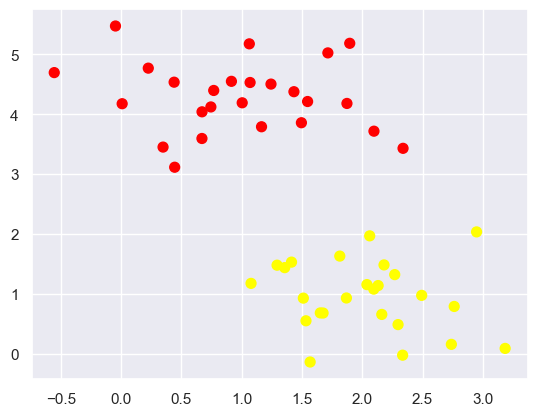

In [18]:
# data generation
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

In [19]:
# Linear Kernel Function Without transformation of data
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

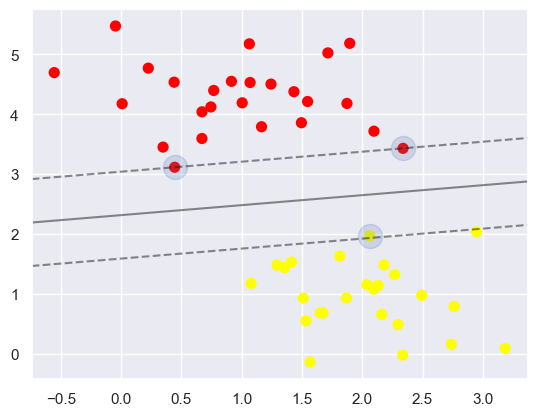

In [25]:
%matplotlib inline 
# 在notebook中展示图像
# Display plots inline in Jupyter Notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

# 定义绘制SVM决策边界的函数
# Define a function to plot the SVM decision boundary
def plot_svc_decision_function(model, ax=None, plot_support=True):
   
    if ax is None:
        ax = plt.gca()  # 获取当前的坐标轴
        # Get current axis if none is provided

    xlim = ax.get_xlim()  # 获取x轴的范围
    ylim = ax.get_ylim()  # 获取y轴的范围
    # Get the limits of the x and y axis

    # 在x和y轴上生成30个点的线性空间
    # Generate 30 points linearly spaced between the x and y axis limits
    x = np.linspace(xlim[0], xlim[1], 30)  
    y = np.linspace(ylim[0], ylim[1], 30)

    # 生成网格以覆盖整个坐标平面
    # Create a meshgrid to cover the entire plane
    Y, X = np.meshgrid(y, x)

    # 将网格点展平，并组合成二维坐标数组
    # Flatten the grid and combine them into a 2D array of coordinates
    xy = np.vstack([X.ravel(), Y.ravel()]).T

    # 使用SVM模型计算每个点的决策函数值
    # Use the SVM model to compute the decision function values for each point
    P = model.decision_function(xy).reshape(X.shape)
    
    # 绘制决策边界（level=0表示决策边界，level=-1和1表示支持向量边界）
    # Plot the decision boundary (level=0 is the decision boundary, levels -1 and 1 are the support vector boundaries)
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # 如果需要，绘制支持向量
    # Optionally plot the support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, alpha=0.2)
        # 绘制支持向量的散点图，使用较大的点表示支持向量
        # Plot support vectors as scattered points

    # 恢复 x 和 y 轴的范围
    # Reset the limits of the x and y axis
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# 绘制数据的散点图
# Plot the scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# 调用函数绘制SVM决策边界
# Call the function to plot the SVM decision boundary
plot_svc_decision_function(model)

# 显示图形
# Display the plot
plt.show()

## SVM高斯核函数划分 SVM Gaussian Kernel Classification

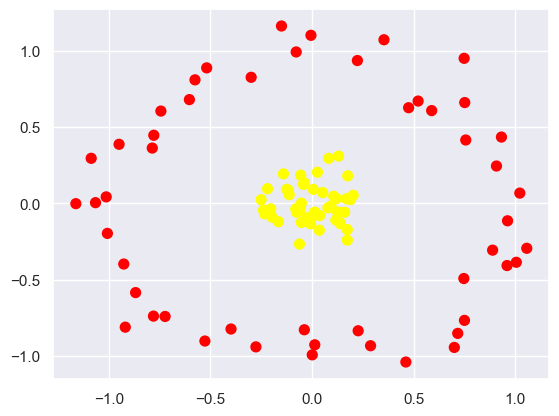

In [26]:
# data generation
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.svm import SVC

X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

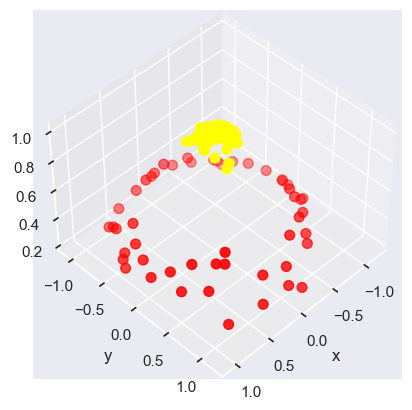

In [27]:
# new dimension
from mpl_toolkits import mplot3d
r = np.exp(-(X ** 2).sum(1))

# 3d visualization
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D(elev=45, azim=45, X=X, y=y)

In [28]:
# use SVM Gaussian Kernel Function（Radial Basis Function, RBF）for SVM
clf = SVC(kernel='rbf')
clf.fit(X, y)

SVC()

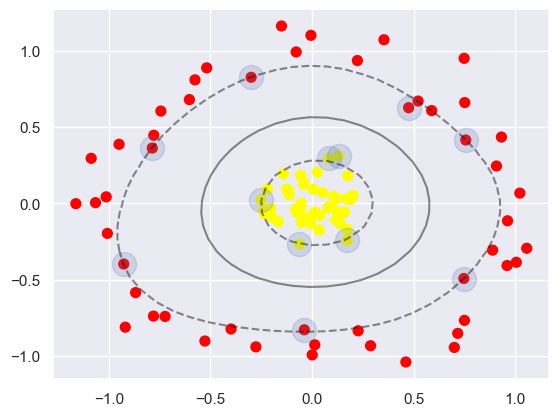

In [29]:
# check it out
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');